## 1.1. <a id='toc1_1_'></a>[🛒 Analytics Task: Store-Level Sales Prediction for OC&Grocery](#toc0_)

### 1.1.1. <a id='toc1_1_1_'></a>[📌 Context](#toc0_)
OC&Grocery is a **new client** undergoing a **5-year strategy refresh**. As part of this transformation, they have asked our team at OC&C to help **analyse store-level performance drivers** to support better decision-making.

### 1.1.2. <a id='toc1_1_2_'></a>[🎯 Objective](#toc0_)
The goal is to **predict annual sales at the store level** using provided data on store attributes. These predictions will be used to:

- Improve the **efficiency of the store portfolio**
- Support **strategic expansion** beyond the current store footprint
- Help OC&Grocery **reduce food waste** and enhance **customer satisfaction**

### 1.1.3. <a id='toc1_1_3_'></a>[📂 Provided Data](#toc0_)
You have access to two datasets:
- **Store Data:** Contains various attributes about each store (e.g., location, size, format, etc.)
- **Sales Data:** Provides the **annual sales figures** for each store

> ⚠️ *Not all store attributes will be relevant, part of your task is to determine which features matter most.*

### 1.1.4. <a id='toc1_1_4_'></a>[🧠 Your Task](#toc0_)
1. **Explore and clean** the datasets.
2. **Select relevant features** from the store data.
3. **Train a predictive model** that estimates annual sales for a subset of stores.
4. Evaluate the model's performance and ensure it's suitable for strategic recommendations.

> 📝 **Reminder:** Focus on balancing your time effectively between **Analytics** and **Strategy**. Avoid over-optimizing the model, spend your time wisely.


**Table of contents**<a id='toc0_'></a>    
- 1.1. [🛒 Analytics Task: Store-Level Sales Prediction for OC&Grocery](#toc1_1_)    
    - 1.1.1. [📌 Context](#toc1_1_1_)    
    - 1.1.2. [🎯 Objective](#toc1_1_2_)    
    - 1.1.3. [📂 Provided Data](#toc1_1_3_)    
    - 1.1.4. [🧠 Your Task](#toc1_1_4_)    
- 2. [Loading Data](#toc2_)    
- 3. [Preprocessing and Feature Preparation](#toc3_)    
- 4. [Model A: Linear Regression NEW](#toc4_)    
- 5. [Model 2: Random Forest Regressor](#toc5_)    
- 6. [Model 3: XGBoost](#toc6_)    
- 7. [Predicting New Data](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 2. <a id='toc2_'></a>[Loading Data](#toc0_)

In [79]:
# Step 1: Install any required packages (if needed)
# Uncomment if packages dont seem to be installed
# !pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Upload files from your local machine
# Make sure to have downloaded them from the Google Drive first!!
#from google.colab import files
# uploaded = files.upload()

# Step 4: Load your CSV files into Pandas DataFrames
# Replace 'store_data.csv' and 'sales_data.csv' with your actual filenames
store_df = pd.read_csv('../../Data/store_data.csv')
sales_df = pd.read_csv('../../Data/sales_data.csv')

# Step 5: Quick look at the data
print("Store data:")
display(store_df.head())

print("\nSales data:")
display(sales_df.head())


Store data:


,store_id,federal_state,store_format,location_type,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,bakery_section,deli_counter,year
0,1,Bavaria,Hypermarket,Urban Residential,6,3920,15741,32.109906,15.188624,14.509256,25,90,5,2566,115,165,2,True,True,2024
1,2,North Rhine-Westphalia,Supermarket,Urban Center,15,1646,8399,44.633713,35.420685,7.841410,22,87,5,6056,106,35,7,True,True,2024
2,3,Saxony,Discounter,Urban Center,7,1231,2447,20.436180,66.443122,8.191310,6,78,5,4441,92,20,1,True,False,2024
3,4,North Rhine-Westphalia,Supermarket,Suburban,12,1704,9069,42.625427,34.803850,7.218120,23,84,1,1294,93,95,0,True,True,2024
4,5,North Rhine-Westphalia,Supermarket,Suburban,15,1296,6714,43.452243,24.802120,12.301529,15,75,3,1594,110,55,4,True,True,2024



Sales data:


,store_id,annual_sales
0,1,36912697
1,2,20121635
2,3,7140552
3,4,18404739
4,5,16994266


In [80]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   store_id                  3000 non-null   int64  
 1   federal_state             3000 non-null   object 
 2   store_format              3000 non-null   object 
 3   location_type             3000 non-null   object 
 4   store_age_years           3000 non-null   int64  
 5   store_area_sqm            3000 non-null   int64  
 6   assortment_count          3000 non-null   int64  
 7   fresh_food_percent        3000 non-null   float64
 8   private_label_percent     3000 non-null   float64
 9   organic_products_percent  3000 non-null   float64
 10  staff_count               3000 non-null   int64  
 11  weekly_opening_hours      3000 non-null   int64  
 12  competitors_nearby        3000 non-null   int64  
 13  population_density        3000 non-null   int64  
 14  avg_inco

In [81]:
store_df.describe()

,store_id,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,staff_count,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,renovation_last_years,year
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,1611.110333,11.975000,1551.372333,6175.033000,31.470647,40.411797,11.279024,14.137333,79.273333,3.554333,2860.424667,101.404667,50.973333,4.543667,2024.0
std,921.952690,6.773995,889.561789,5028.728703,8.316014,17.310411,5.426194,9.153346,9.574959,1.724347,1728.614398,12.261472,49.056819,4.473116,0.0
min,1.000000,0.000000,321.000000,528.000000,15.001029,10.059507,2.000000,3.000000,60.000000,0.000000,350.000000,70.000000,0.000000,0.000000,2024.0
25%,815.750000,7.000000,978.000000,1980.000000,23.992576,25.646145,6.987832,6.000000,72.000000,2.000000,1427.000000,93.000000,20.000000,0.000000,2024.0
50%,1617.500000,12.000000,1307.000000,3885.000000,30.139165,34.956313,10.465743,11.000000,78.000000,3.000000,2734.500000,102.000000,35.000000,3.000000,2024.0
75%,2409.250000,16.250000,1905.750000,9787.000000,38.990004,57.602183,14.878791,21.000000,84.000000,5.000000,3972.250000,110.000000,65.000000,8.000000,2024.0
max,3200.000000,30.000000,5470.000000,26879.000000,44.966530,69.996186,31.415520,49.000000,110.000000,7.000000,6499.000000,131.000000,340.000000,15.000000,2024.0


In [82]:
store_df["store_format"].value_counts()    

store_format
Supermarket    1201
Discounter     1185
Convenience     311
Hypermarket     303
Name: count, dtype: int64

In [83]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store_id      3000 non-null   int64
 1   annual_sales  3000 non-null   int64
dtypes: int64(2)
memory usage: 47.0 KB


In [84]:
sales_df.describe()

,store_id,annual_sales
count,3000.000000,3.000000e+03
mean,1611.110333,1.666832e+07
std,921.952690,1.057503e+07
min,1.000000,1.144618e+06
25%,815.750000,1.104478e+07
50%,1617.500000,1.459208e+07
75%,2409.250000,1.989197e+07
max,3200.000000,7.849110e+07


No blank values found and min/max seem to make sense; hence, no immediate action taken.

In [85]:
# Merge store and sales data
df = pd.merge(store_df, sales_df, on='store_id')
print("Merged data shape:", df.shape)

Merged data shape: (3000, 21)


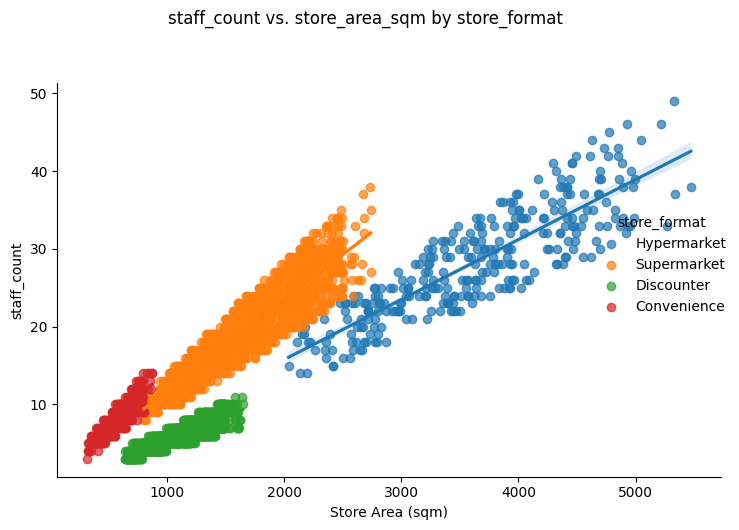

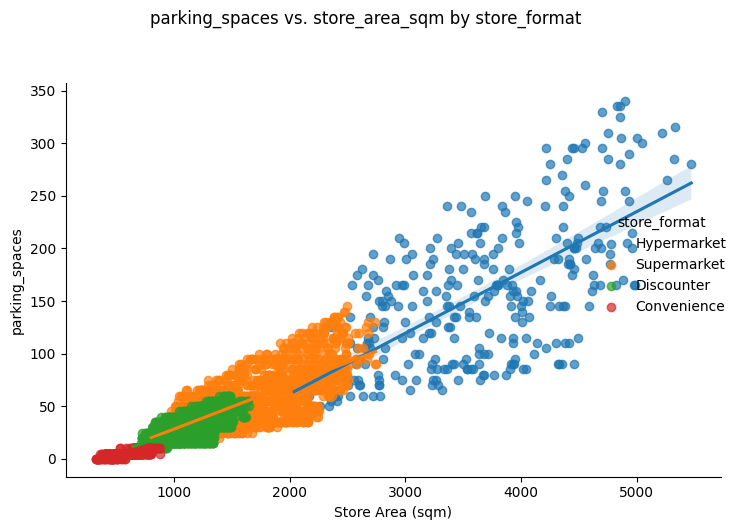

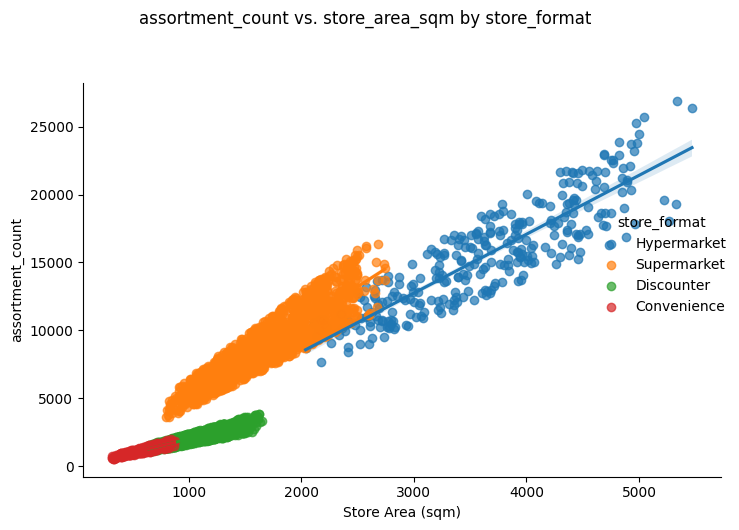

In [86]:
# Checking if we need to add scaling features normalized by area
import seaborn as sns
import matplotlib.pyplot as plt

candidate_vars = ['staff_count', 'parking_spaces', 'assortment_count']
hue_column = 'store_format'  # Replace with your desired column

for var in candidate_vars:
    # lmplot handles figure creation internally, so no need for plt.figure()
    g = sns.lmplot(
        x='store_area_sqm', 
        y=var,
        data=df,
        hue=hue_column,
        aspect=1.2,      # width "aspect ratio" of each plot
        height=5,        # height of the plot
        scatter_kws={"alpha": 0.7} 
    )
    g.set_axis_labels("Store Area (sqm)", var)
    g.fig.suptitle(f"{var} vs. store_area_sqm by {hue_column}", y=1.05)
    plt.tight_layout()
    plt.show()


We will add the columns in the pre-processing below.

# 3. <a id='toc3_'></a>[Preprocessing and Feature Preparation](#toc0_)

Merged data shape: (3000, 21)


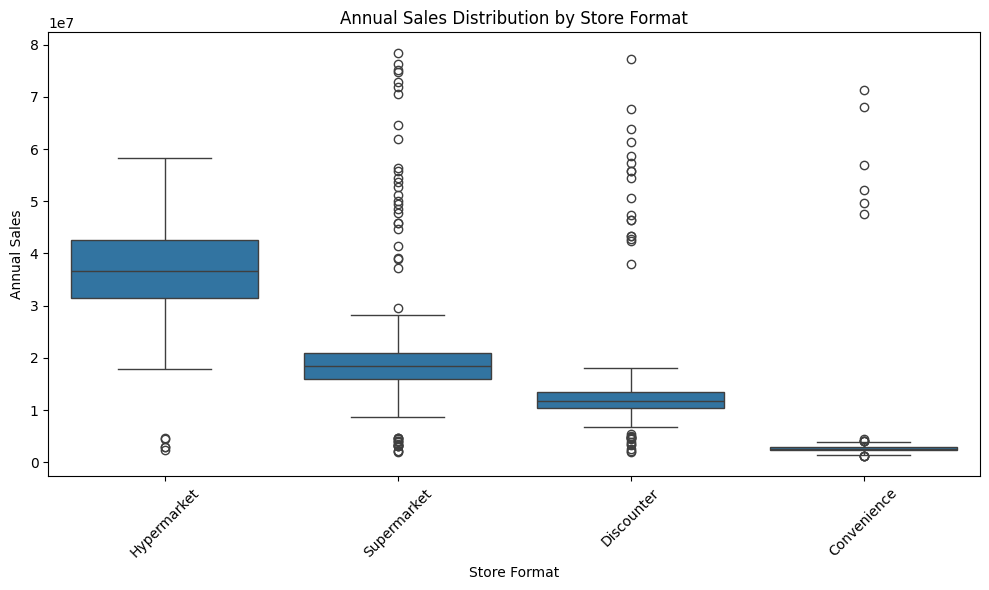

Data shape after conservative outlier removal: (3000, 21)


In [87]:
# --- Preprocessing and Feature Preparation with Conservative Outlier Removal and Ratio Features ---

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Merge store and sales data
df = pd.merge(store_df, sales_df, on='store_id')
print("Merged data shape:", df.shape)

# Step 1: Outlier Analysis and Removal 
# Create a boxplot of Annual Sales by Store Format
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='annual_sales', data=df)
plt.title("Annual Sales Distribution by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Annual Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to remove outliers using the IQR method within each store_format group
def remove_outliers(group):
    Q1 = group['annual_sales'].quantile(0.25)
    Q3 = group['annual_sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['annual_sales'] >= lower_bound) & (group['annual_sales'] <= upper_bound)]

# Uncomment the next line to remove outliers:
# df = df.groupby('store_format', group_keys=False).apply(remove_outliers)

print("Data shape after conservative outlier removal:", df.shape)

# Reset the index so that all subsequent operations have aligned indices
df = df.reset_index(drop=True)

# Step 2: Save store_id (now aligned) before dropping it
store_ids = df['store_id'].copy()

# Step 3: Drop irrelevant columns
df = df.drop(columns=['store_id', 'year'])  # 'year' is always 2024 in this dataset

# Step X: Adding new ratio features
df['staff_per_sqm'] = df['staff_count'] / df['store_area_sqm']
df['parking_spaces_per_sqm'] = df['parking_spaces'] / df['store_area_sqm']
df['assortment_per_sqm'] = df['assortment_count'] / df['store_area_sqm']

# Step 4: One-hot encode categorical columns
categorical_cols = ['federal_state', 'store_format', 'location_type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Split into features and target
X = df.drop(columns=['annual_sales'])
y = df['annual_sales']

# Step 6: Train-test split
X_train, X_test, y_train, y_test, store_ids_train, store_ids_test = train_test_split(
    X, y, store_ids, test_size=0.2, random_state=42
)

# Step 7: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Create DataFrames with feature names (for analysis and plotting)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


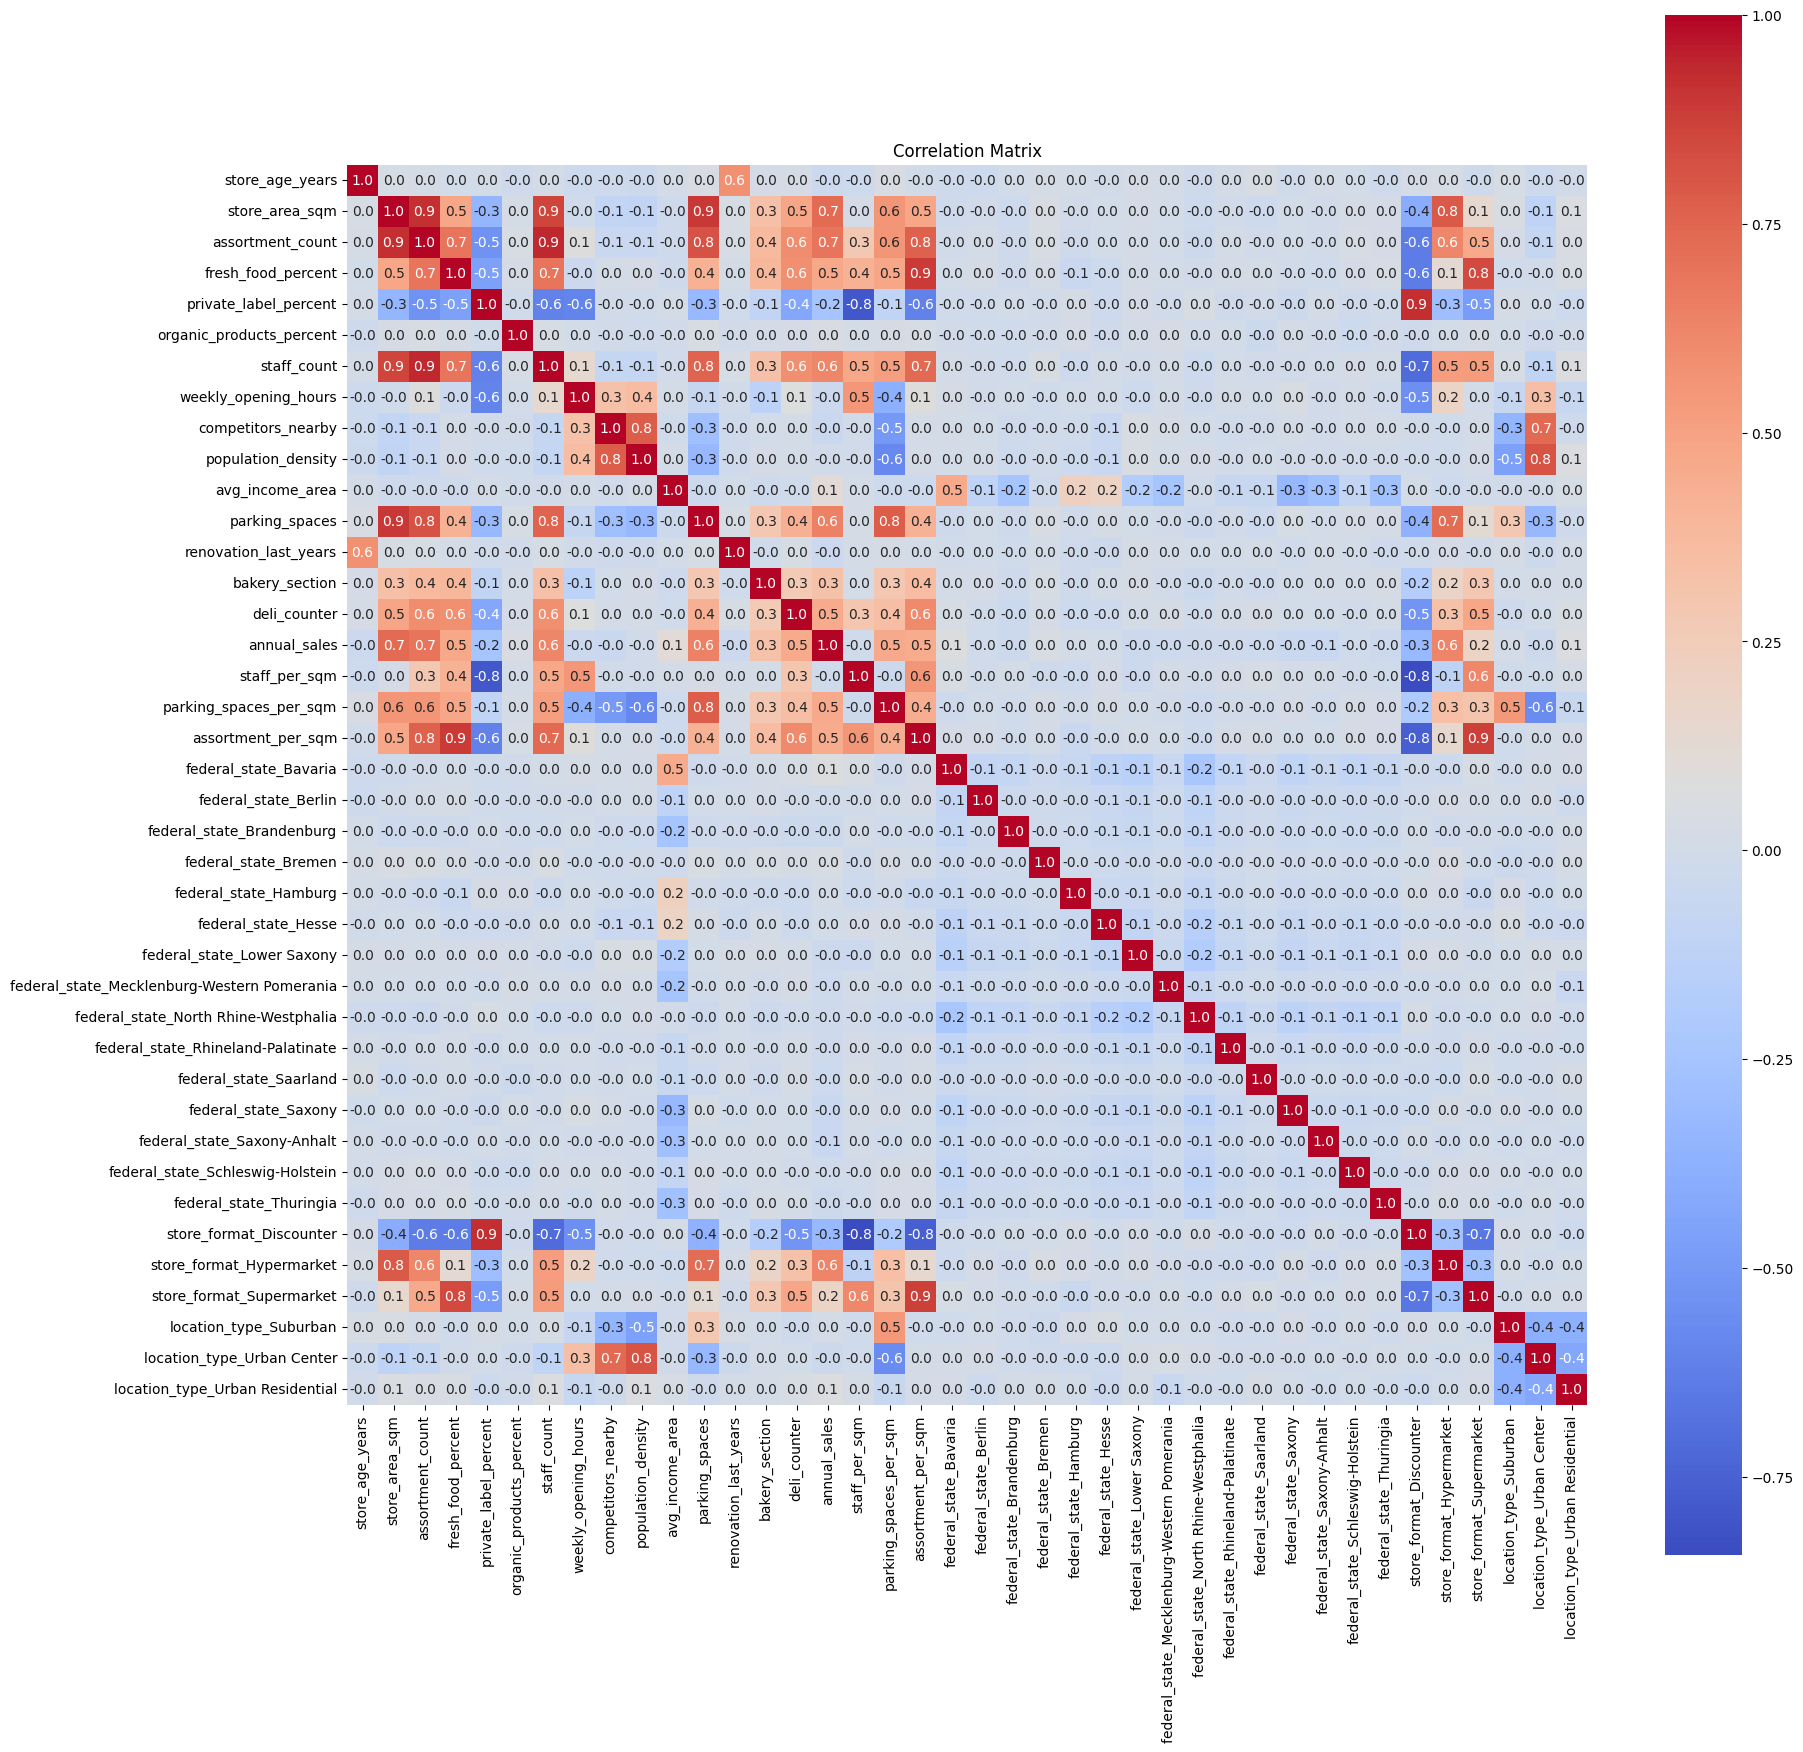

In [88]:
# Show correlation matrix
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [89]:
# --- Feature Selection and Interaction Terms ---

import numpy as np

# Compute the absolute correlation matrix on the scaled training data
corr_matrix = X_train_scaled_df.corr().abs()

# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop with any correlation above the threshold (0.9)
threshold = 0.9
columns_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Dropping columns due to high correlation:", columns_to_drop)

# Drop these columns from both training and test scaled DataFrames
X_train_reduced = X_train_scaled_df.drop(columns=columns_to_drop)
X_test_reduced = X_test_scaled_df.drop(columns=columns_to_drop)

# Final split data for modeling
X_train_final = X_train_reduced.copy()
X_test_final = X_test_reduced.copy()

print("Final training data shape:", X_train_final.shape)
print("Final test data shape:", X_test_final.shape)


Dropping columns due to high correlation: ['assortment_count', 'staff_count', 'store_format_Discounter']
Final training data shape: (2400, 36)
Final test data shape: (600, 36)


# 4. <a id='toc4_'></a>[Model A: Linear Regression NEW](#toc0_)

Linear Regression RMSE: 13,222,002
Linear Regression R² Score: 0.162
Linear Regression Adjusted R² Score: 0.109


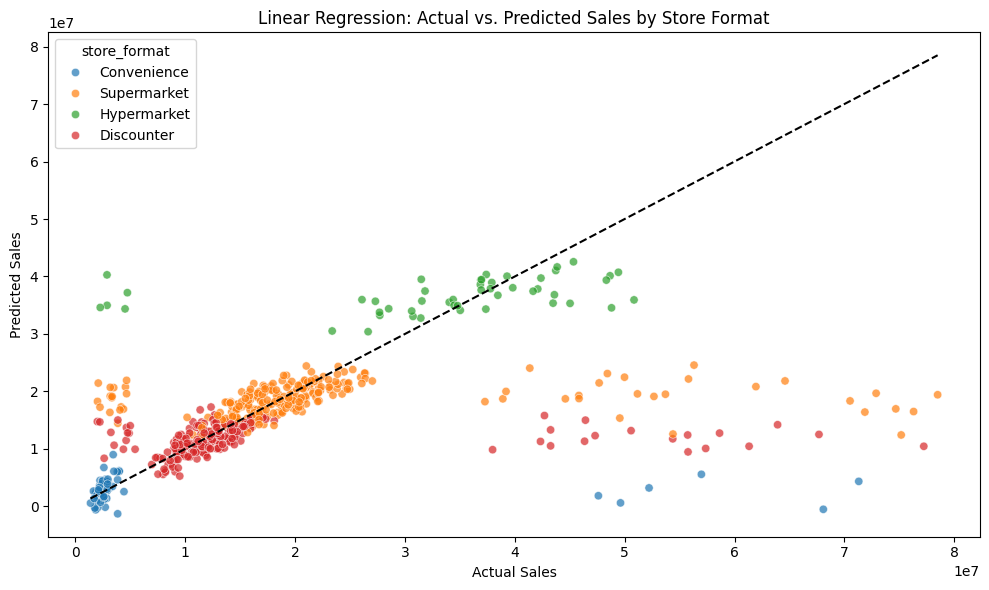

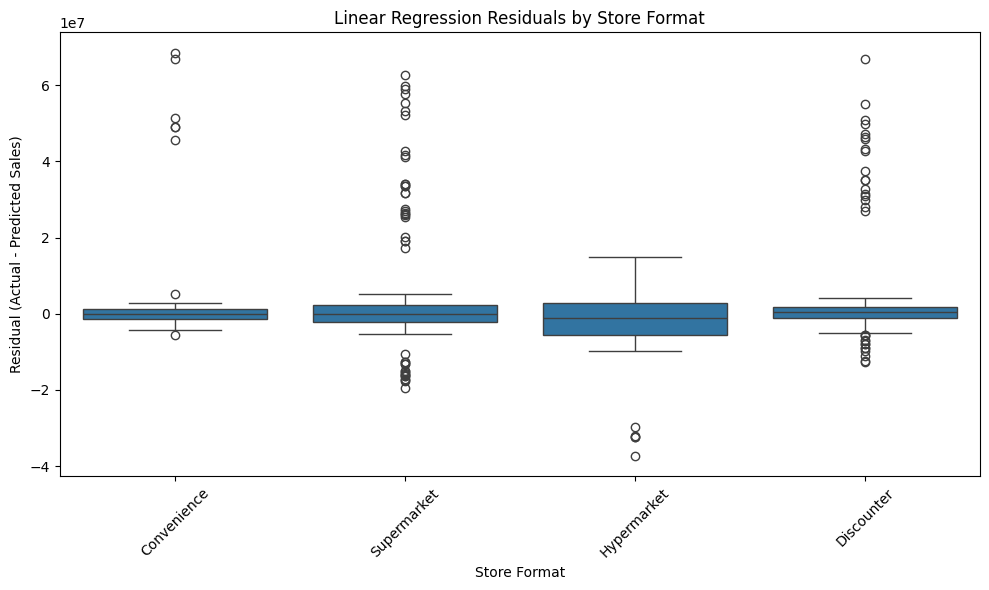

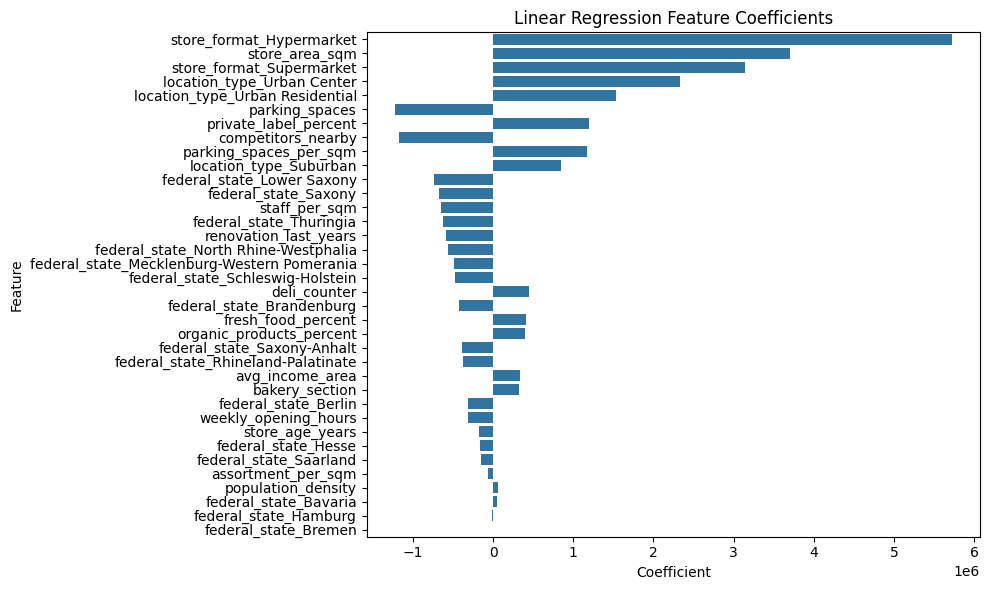

In [90]:
# --- Linear Regression Modeling, Evaluation, and Visualization with Final Splits ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model on the final training data
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

# Predict on the final test set
y_pred_lr = lr_model.predict(X_test_final)

# Compute performance metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Calculate Adjusted R²
n = len(y_test)                  # Number of observations
k = X_test_final.shape[1]        # Number of predictors
adjusted_r2_lr = 1 - (1 - r2_lr) * ((n - 1) / (n - k - 1))

print(f"Linear Regression RMSE: {rmse_lr:,.0f}")
print(f"Linear Regression R² Score: {r2_lr:.3f}")
print(f"Linear Regression Adjusted R² Score: {adjusted_r2_lr:.3f}")

# Create a performance DataFrame for linear regression
performance_lr = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_lr
})
performance_lr['Residual'] = performance_lr['Actual_Sales'] - performance_lr['Predicted_Sales']

# Merge with store info to include store_format for visualization
store_info = store_df[['store_id', 'store_format']]
performance_lr_info = performance_lr.merge(store_info, on='store_id', how='left')

# Actual vs. Predicted Sales Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Sales', y='Predicted_Sales', hue='store_format',
                data=performance_lr_info, alpha=0.7)
plt.plot([performance_lr_info['Actual_Sales'].min(), performance_lr_info['Actual_Sales'].max()],
         [performance_lr_info['Actual_Sales'].min(), performance_lr_info['Actual_Sales'].max()],
         '--', color='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales by Store Format")
plt.tight_layout()
plt.show()

# Residual Plot by Store Format
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='Residual', data=performance_lr_info)
plt.title("Linear Regression Residuals by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Residual (Actual - Predicted Sales)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Importance (Coefficients) Plot
features = X_train_final.columns
coef = lr_model.coef_
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Linear Regression Feature Coefficients")
plt.tight_layout()
plt.show()


# 5. <a id='toc5_'></a>[Model 2: Random Forest Regressor](#toc0_)

Random Forest RMSE: 13,278,301
Random Forest R² Score: 0.155
Random Forest Adjusted R² Score: 0.101


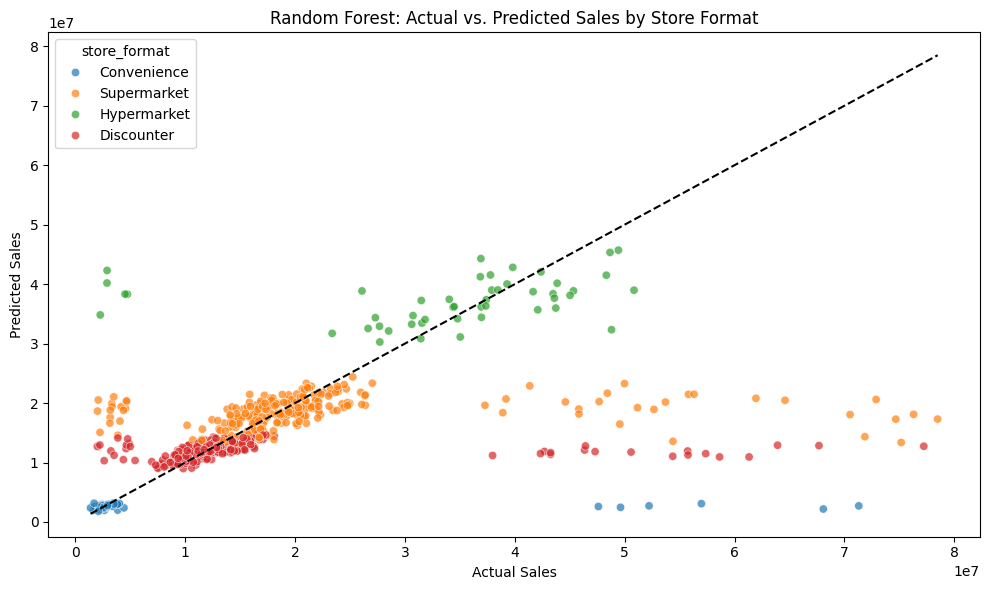

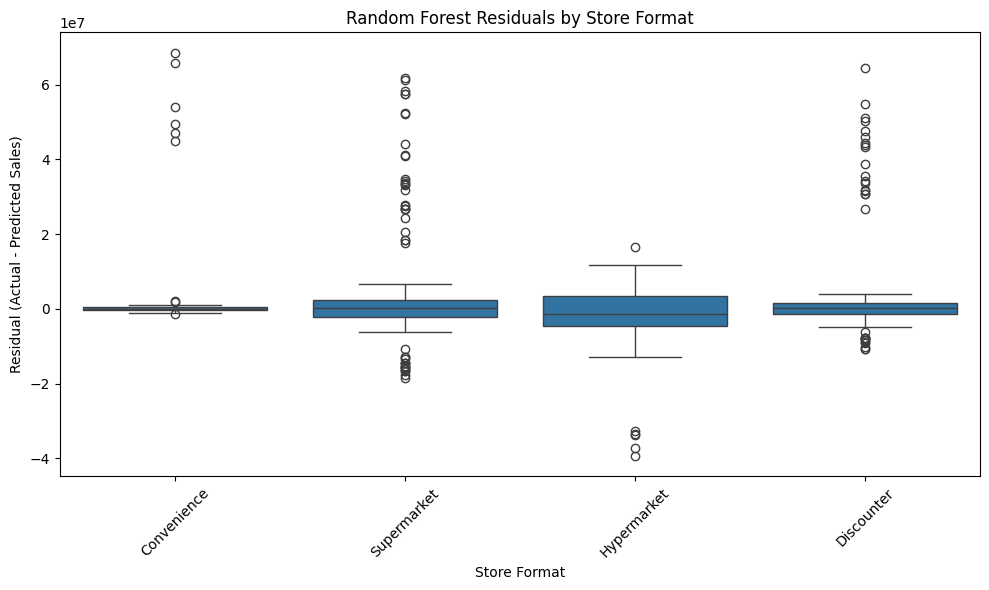

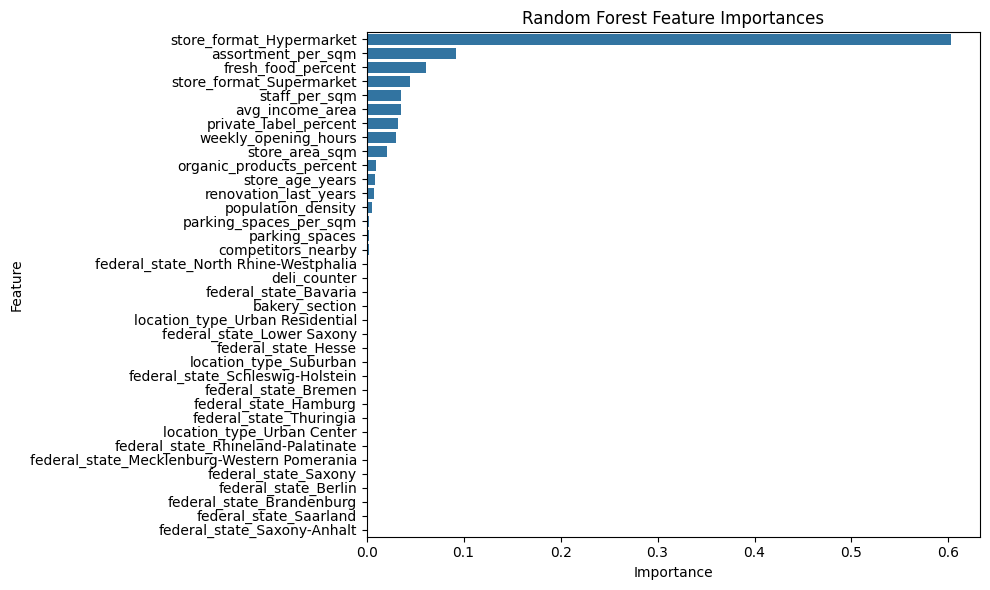

In [91]:
# --- Random Forest Modeling, Evaluation, and Visualization with Updated Splits ---

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Train the Random Forest Regressor on the updated (final) training set
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train_final, y_train)

# Predict on test data using the updated final splits
y_pred_rf = rf_model.predict(X_test_final)

# Evaluate model performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate Adjusted R²
n = len(y_test)                  # Number of observations
k = X_test_final.shape[1]        # Number of predictors
adjusted_r2_rf = 1 - (1 - r2_rf) * ((n - 1) / (n - k - 1))

print(f"Random Forest RMSE: {rmse_rf:,.0f}")
print(f"Random Forest R² Score: {r2_rf:.3f}")
print(f"Random Forest Adjusted R² Score: {adjusted_r2_rf:.3f}")

# --- Actual vs. Predicted Sales Plot Colored by Store Format ---
# Create a performance DataFrame for Random Forest
performance_rf = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_rf
})
performance_rf['Residual'] = performance_rf['Actual_Sales'] - performance_rf['Predicted_Sales']

# Merge performance with store info to retrieve store_format
store_info = store_df[['store_id', 'store_format']]
performance_rf_info = performance_rf.merge(store_info, on='store_id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Sales', y='Predicted_Sales',
                hue='store_format', data=performance_rf_info, alpha=0.7)
plt.plot([performance_rf_info['Actual_Sales'].min(), performance_rf_info['Actual_Sales'].max()],
         [performance_rf_info['Actual_Sales'].min(), performance_rf_info['Actual_Sales'].max()],
         '--', color='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs. Predicted Sales by Store Format")
plt.tight_layout()
plt.show()

# --- Residual Plot by Store Format ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='Residual', data=performance_rf_info)
plt.title("Random Forest Residuals by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Residual (Actual - Predicted Sales)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Feature Importance Plot ---
# Use the final training splits feature names
features = X_train_final.columns
importances_rf = rf_model.feature_importances_
imp_df_rf = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
imp_df_rf = imp_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df_rf)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


# 6. <a id='toc6_'></a>[Model 3: XGBoost](#toc0_)

XGBoost RMSE: 13,323,378
XGBoost R² Score: 0.149
XGBoost Adjusted R² Score: 0.095


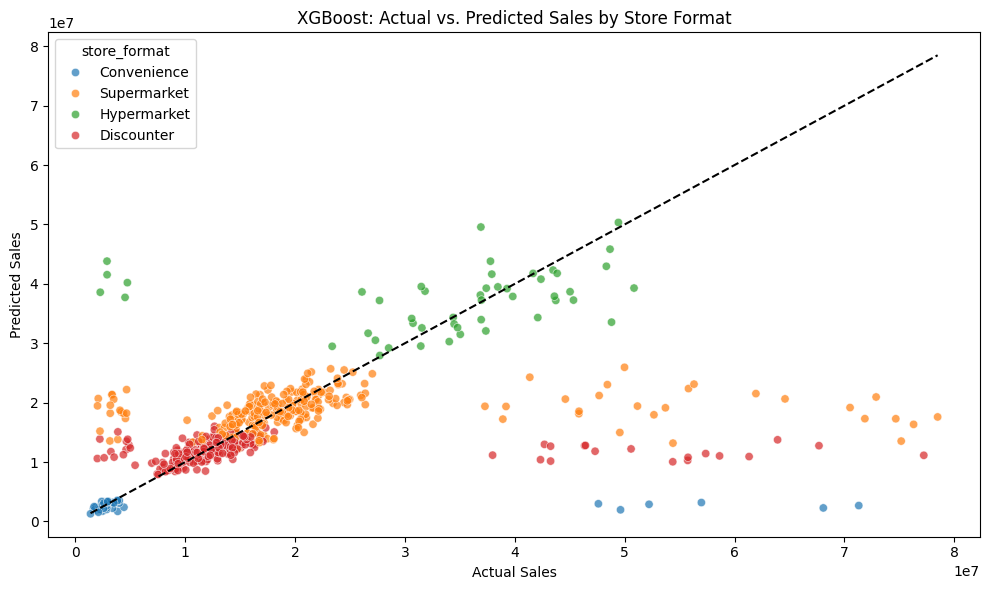

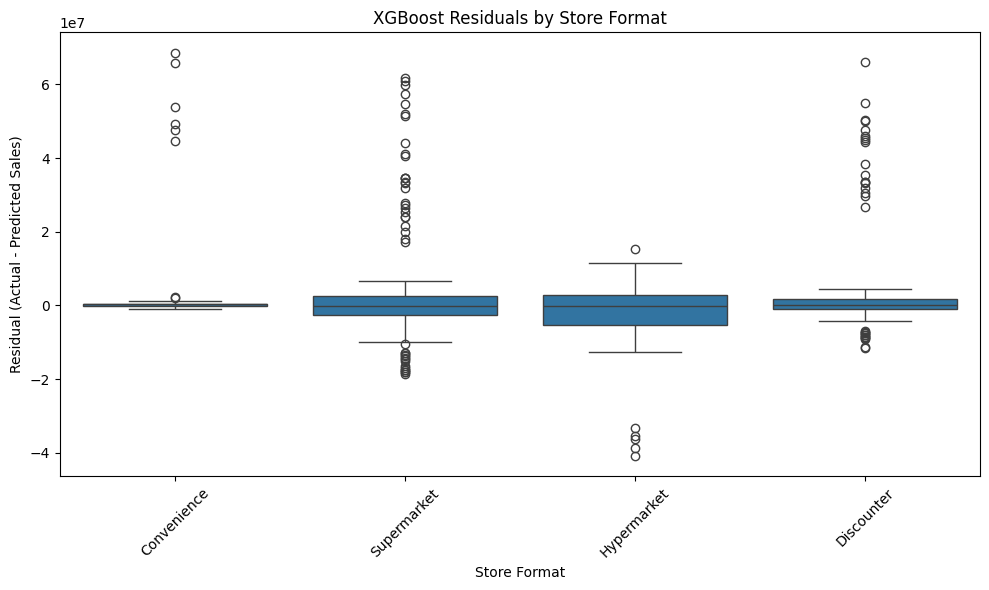

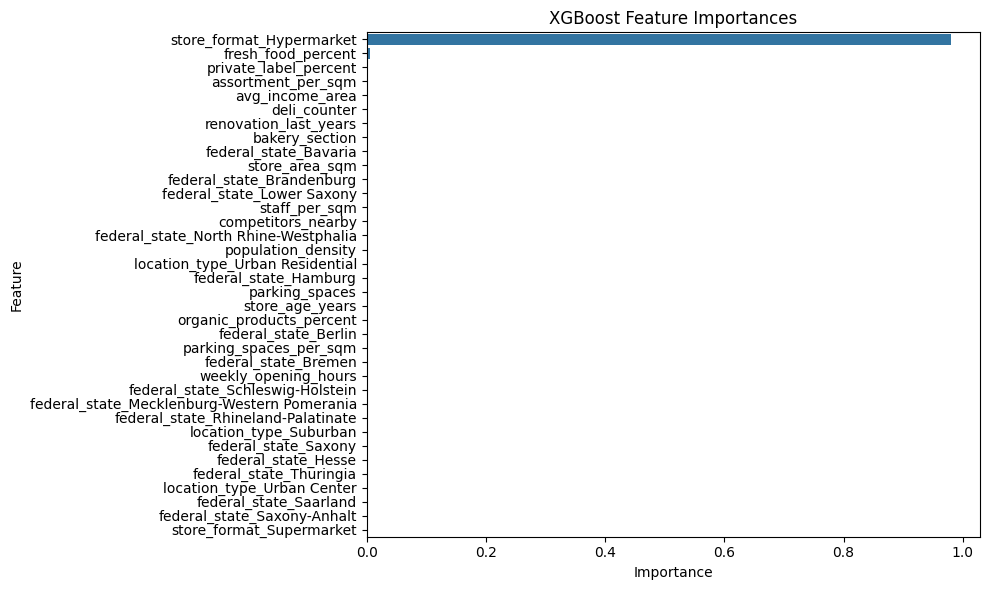

In [92]:
# --- XGBoost Modeling, Evaluation, and Visualization with Updated Splits ---

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Train the XGBoost Regressor on the updated (final) training set
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_final, y_train)

# Predict on test data using the updated final splits
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate model performance
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate Adjusted R²
n = len(y_test)                  # Number of observations
k = X_test_final.shape[1]        # Number of predictors
adjusted_r2_xgb = 1 - (1 - r2_xgb) * ((n - 1) / (n - k - 1))

print(f"XGBoost RMSE: {rmse_xgb:,.0f}")
print(f"XGBoost R² Score: {r2_xgb:.3f}")
print(f"XGBoost Adjusted R² Score: {adjusted_r2_xgb:.3f}")

# --- Actual vs. Predicted Sales Plot Colored by Store Format ---
# Build a performance DataFrame for XGBoost
performance_xgb = pd.DataFrame({
    'store_id': store_ids_test.values,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred_xgb
})
performance_xgb['Residual'] = performance_xgb['Actual_Sales'] - performance_xgb['Predicted_Sales']

# Merge with store info to get store_format
store_info = store_df[['store_id', 'store_format']]
performance_xgb_info = performance_xgb.merge(store_info, on='store_id', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual_Sales', y='Predicted_Sales',
                hue='store_format', data=performance_xgb_info, alpha=0.7)
plt.plot([performance_xgb_info['Actual_Sales'].min(), performance_xgb_info['Actual_Sales'].max()],
         [performance_xgb_info['Actual_Sales'].min(), performance_xgb_info['Actual_Sales'].max()],
         '--', color='black')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost: Actual vs. Predicted Sales by Store Format")
plt.tight_layout()
plt.show()

# --- Residual Plot by Store Format ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_format', y='Residual', data=performance_xgb_info)
plt.title("XGBoost Residuals by Store Format")
plt.xlabel("Store Format")
plt.ylabel("Residual (Actual - Predicted Sales)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Feature Importance Plot ---
# Use the final training set feature names
features = X_train_final.columns
importances_xgb = xgb_model.feature_importances_
imp_df_xgb = pd.DataFrame({'Feature': features, 'Importance': importances_xgb})
imp_df_xgb = imp_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df_xgb)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


In [93]:
print(f"Linear Regression Adjusted R² Score: {adjusted_r2_lr:.3f}")
print(f"Random Forest Adjusted R² Score: {adjusted_r2_rf:.3f}")
print(f"XGBoost Adjusted R² Score: {adjusted_r2_xgb:.3f}")

Linear Regression Adjusted R² Score: 0.109
Random Forest Adjusted R² Score: 0.101
XGBoost Adjusted R² Score: 0.095


# 7. <a id='toc7_'></a>[Predicting New Data](#toc0_)

Both linear regression and the Random Forest Regressor share the highest Adjusted R² of 0.920/0,919. Given that the Random Forest Regressor accounts for more exceptional data such as non-linear independent variables (potentially found in test data), we will use this model to predict the sales on given test data.

In [94]:
# --- Predicting Annual Sales for New Test Stores using Random Forest Model with Ratio Features ---

import pandas as pd

# Load test_stores.csv (adjust the filepath as needed)
test_stores_df = pd.read_csv('../../Data/test_stores.csv')

# Preprocessing for test stores:

# 1. Create new ratio features analogous to training
test_stores_df['staff_per_sqm'] = test_stores_df['staff_count'] / test_stores_df['store_area_sqm']
test_stores_df['parking_spaces_per_sqm'] = test_stores_df['parking_spaces'] / test_stores_df['store_area_sqm']
test_stores_df['assortment_per_sqm'] = test_stores_df['assortment_count'] / test_stores_df['store_area_sqm']

# 2. Save store_id (if needed for later merging) and drop irrelevant columns (store_id, year)
store_ids_test_original = test_stores_df['store_id'].copy()  # save store id for output
test_stores_processed = test_stores_df.drop(columns=['store_id', 'year'], errors='ignore')
# (Note: in training, 'year' was dropped because it was constant)

# 3. One-hot encode categorical columns (using the same categories as training)
categorical_cols = ['federal_state', 'store_format', 'location_type']
test_stores_processed = pd.get_dummies(test_stores_processed, columns=categorical_cols, drop_first=True)

# 4. Reindex the test set to include the same feature columns as in your training data (X)
test_stores_processed = test_stores_processed.reindex(columns=X.columns, fill_value=0)

# 5. Scale the features using the same scaler fitted on the training data
X_test_stores_scaled = scaler.transform(test_stores_processed)
X_test_stores_scaled_df = pd.DataFrame(X_test_stores_scaled, columns=X.columns)

# 6. Drop the same highly correlated features (columns_to_drop) as determined from training
X_test_reduced = X_test_stores_scaled_df.drop(columns=columns_to_drop)

# Final preprocessed test features for prediction
X_test_final_pred = X_test_reduced.copy()

# 7. Predict using the Random Forest model (rf_model) trained earlier
predicted_sales = rf_model.predict(X_test_final_pred)

# 8. Create an output DataFrame including predicted annual sales and save to CSV
output_df = test_stores_df.copy()
output_df['Predicted_Annual_Sales'] = predicted_sales

# Display the first few rows of the predictions and save to CSV
display(output_df.head())
output_df.to_csv('test_stores_predictions.csv', index=False)


,store_id,federal_state,store_format,location_type,store_age_years,store_area_sqm,assortment_count,fresh_food_percent,private_label_percent,organic_products_percent,...,avg_income_area,parking_spaces,renovation_last_years,bakery_section,deli_counter,year,staff_per_sqm,parking_spaces_per_sqm,assortment_per_sqm,Predicted_Annual_Sales
0,2385,Bavaria,Discounter,Suburban,11,1487,2691,20.681297,68.430234,10.745443,...,103,45,9,True,False,2024,0.004707,0.030262,1.809684,1.211294e+07
1,2539,Lower Saxony,Supermarket,Suburban,4,2372,14347,42.506749,30.132762,5.693433,...,86,100,0,True,True,2024,0.012226,0.042159,6.048482,1.868321e+07
2,2177,Baden-Württemberg,Discounter,Urban Center,12,771,1817,23.575289,63.748485,4.164034,...,106,15,6,True,False,2024,0.006485,0.019455,2.356680,1.156784e+07
3,898,Bavaria,Discounter,Rural,8,779,1794,24.722579,67.647702,14.130866,...,124,25,5,True,False,2024,0.006418,0.032092,2.302953,1.262753e+07
4,215,Hesse,Discounter,Urban Center,18,1324,2995,24.394745,66.683404,8.808328,...,115,20,5,True,False,2024,0.006042,0.015106,2.262085,1.359732e+07


# Analyzing Underperformers

In [95]:
# --- Step 1: Classify Underperformers Using Random Forest Output ---
# (Assumes performance_rf_info is available from your Random Forest evaluation)
performance_rf_info['Performance_Class'] = performance_rf_info.apply(
    lambda row: 'Underperformer' if row['Actual_Sales'] < row['Predicted_Sales'] else 'Regular',
    axis=1
)
performance_rf_info[['store_id', 'Actual_Sales', 'Predicted_Sales', 'Performance_Class']].head()

,store_id,Actual_Sales,Predicted_Sales,Performance_Class
0,1935,3083368,2.634146e+06,Regular
1,1282,3172469,1.759772e+07,Underperformer
2,1953,2886322,4.230474e+07,Underperformer
3,278,4556873,1.911443e+07,Underperformer
4,2678,64598307,2.046676e+07,Regular


In [96]:
# --- Step 2: Prepare the Test Features for Merging ---
# Here, we use the final test features used for modeling (X_test_final) 
# and add the store_id column from store_ids_test.
features_test = X_test_final.copy()
features_test['store_id'] = store_ids_test.values

# Now merge with the performance classification from performance_rf_info.
combined_test = features_test.merge(
    performance_rf_info[['store_id', 'Performance_Class', 'store_format']],
    on='store_id',
    how='left'
)
combined_test.head()


,store_age_years,store_area_sqm,fresh_food_percent,private_label_percent,organic_products_percent,weekly_opening_hours,competitors_nearby,population_density,avg_income_area,parking_spaces,...,federal_state_Schleswig-Holstein,federal_state_Thuringia,store_format_Hypermarket,store_format_Supermarket,location_type_Suburban,location_type_Urban Center,location_type_Urban Residential,store_id,Performance_Class,store_format
0,-0.149025,-0.966110,-1.797777,-0.953390,-1.025819,2.557565,-0.897497,-1.041585,0.961876,-0.932266,...,-0.213896,-0.1746,-0.344791,-0.809427,1.690716,-0.654654,-0.654004,1935,Regular,Convenience
1,-0.445345,0.293727,1.225050,-0.110089,0.113440,-1.385131,-0.897497,-1.371441,-0.696411,0.563015,...,-0.213896,-0.1746,-0.344791,1.235442,-0.591465,-0.654654,-0.654004,1282,Underperformer,Supermarket
2,-0.741666,0.850348,0.733198,-0.769638,1.526506,1.727523,0.836797,1.953111,0.878961,-0.035098,...,-0.213896,-0.1746,2.900304,-0.809427,-0.591465,1.527525,-0.654004,1953,Underperformer,Hypermarket
3,-0.297185,0.795237,0.816514,-0.045867,-1.644847,-0.762600,-0.897497,-0.908141,-1.028069,1.260812,...,-0.213896,-0.1746,-0.344791,1.235442,1.690716,-0.654654,-0.654004,278,Underperformer,Supermarket
4,-0.297185,0.244127,0.963860,-0.772165,-0.273917,0.171196,-0.897497,0.263973,0.381475,0.263958,...,-0.213896,-0.1746,-0.344791,1.235442,-0.591465,-0.654654,1.529042,2678,Regular,Supermarket


In [97]:
# --- Step 3: Run the T-Test Analysis and Visualization (Example with Boxplots) ---
import numpy as np
from scipy.stats import ttest_ind

# Define columns to exclude (non-feature columns)
exclude_cols = ['store_id', 'Performance_Class', 'store_format']

# Identify all numeric columns for testing
all_features = [col for col in combined_test.columns 
                if col not in exclude_cols and np.issubdtype(combined_test[col].dtype, np.number)]

# Create an empty dictionary to store t-test results per store_format
results = {}

for fmt in combined_test['store_format'].unique():
    subset = combined_test[combined_test['store_format'] == fmt].copy()
    group_under = subset[subset['Performance_Class'] == 'Underperformer']
    group_reg = subset[subset['Performance_Class'] == 'Regular']
    
    test_results = []
    for feature in all_features:
        # Ensure both groups have enough data
        if len(group_under) > 1 and len(group_reg) > 1:
            t_stat, p_value = ttest_ind(group_under[feature], group_reg[feature], equal_var=False)
            mean_diff = group_under[feature].mean() - group_reg[feature].mean()
            test_results.append({
                'Feature': feature,
                'T-Statistic': t_stat,
                'P-Value': p_value,
                'Underperformer_Mean': group_under[feature].mean(),
                'Regular_Mean': group_reg[feature].mean(),
                'Mean_Difference': mean_diff
            })
    
    results_df = pd.DataFrame(test_results).sort_values(by='P-Value')
    results[fmt] = results_df
    print(f"\nStore Format: {fmt}")
    print(results_df.head())  # Short preview

# Optionally combine results for an overall overview
combined_results = []
for fmt, df_res in results.items():
    df_res = df_res.copy()
    df_res['store_format'] = fmt
    combined_results.append(df_res)
combined_results_df = pd.concat(combined_results, ignore_index=True)
print("\nCombined T-Test Results by Store Format (preview):")
print(combined_results_df.sort_values(['store_format', 'P-Value']).head(10))


Store Format: Convenience
                      Feature  T-Statistic       P-Value  Underperformer_Mean  \
31   store_format_Hypermarket     6.000000  6.949528e-07            -0.344791   
30    federal_state_Thuringia     6.000000  6.949528e-07            -0.174600   
16      federal_state_Bavaria    -2.898275  6.351941e-03            -0.420770   
18  federal_state_Brandenburg     2.449490  2.198300e-02             1.024817   
0             store_age_years     2.282486  2.875238e-02             0.165075   

    Regular_Mean  Mean_Difference  
31     -0.344791     5.551115e-17  
30     -0.174600     2.775558e-17  
16      0.108461    -5.292311e-01  
18     -0.172049     1.196866e+00  
0      -0.485389     6.504642e-01  

Store Format: Supermarket
                     Feature  T-Statistic       P-Value  Underperformer_Mean  \
32  store_format_Supermarket   -11.489125  1.318810e-21             1.235442   
31  store_format_Hypermarket    11.489125  1.318810e-21            -0.344791   
3  

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occ


Store Format: Convenience
Significant features: ['store_age_years', 'renovation_last_years']


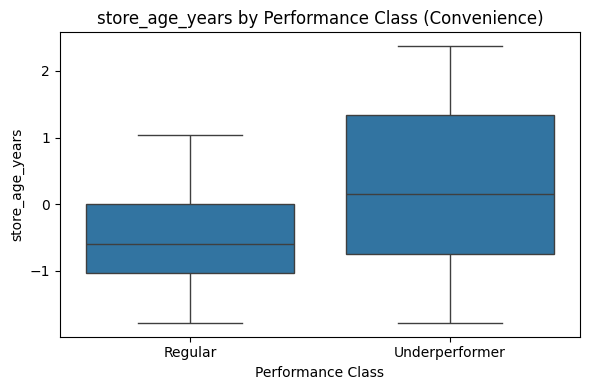

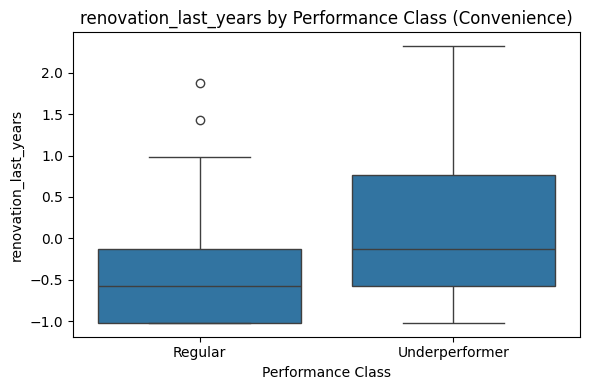


Store Format: Supermarket
Significant features: ['private_label_percent']


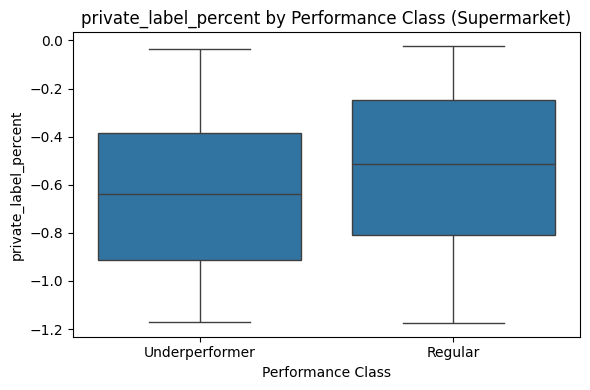


Store Format: Hypermarket
Significant features: ['staff_per_sqm']


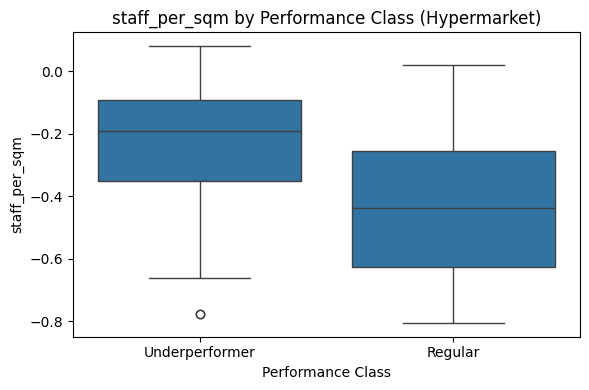


Store Format: Discounter
Significant features: ['store_area_sqm']


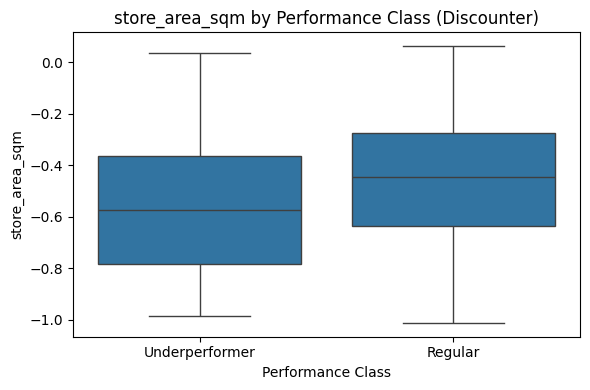

In [98]:
# --- Step 4: Plot Focused Boxplots for Significant Features (Excluding State and Store Format Dummies) ---
significance_threshold = 0.05
signif_features_by_format = {}

for fmt in combined_test['store_format'].unique():
    subset_res = combined_results_df[
        (combined_results_df['store_format'] == fmt) & 
        (combined_results_df['P-Value'] < significance_threshold)
    ]
    # Exclude dummy variables for states and store formats
    features = subset_res['Feature'].unique()
    features = [feat for feat in features if not (feat.startswith("federal_state_") or feat.startswith("store_format_"))]
    signif_features_by_format[fmt] = features

for fmt, features in signif_features_by_format.items():
    if len(features) == 0:
        print(f"No significant features for store format '{fmt}'.")
        continue
    print(f"\nStore Format: {fmt}")
    print("Significant features:", features)
    subset_data = combined_test[combined_test['store_format'] == fmt]
    for feat in features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Performance_Class', y=feat, data=subset_data)
        plt.title(f"{feat} by Performance Class ({fmt})")
        plt.xlabel("Performance Class")
        plt.ylabel(feat)
        plt.tight_layout()
        plt.show()


Store Format: Convenience
Significant features: ['store_age_years', 'renovation_last_years']


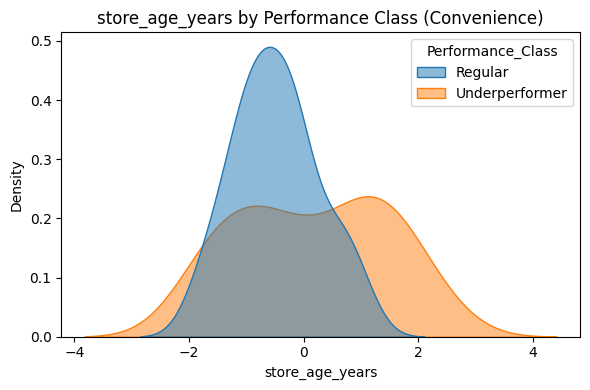

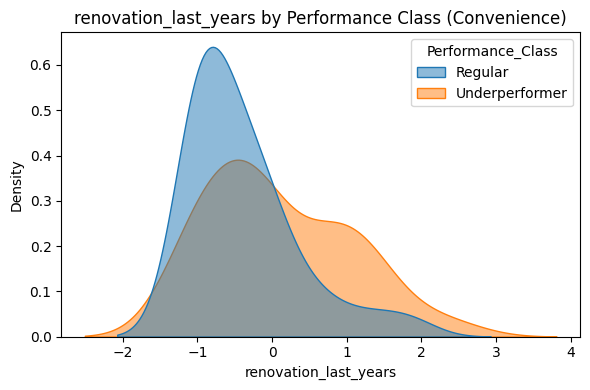


Store Format: Supermarket
Significant features: ['private_label_percent']


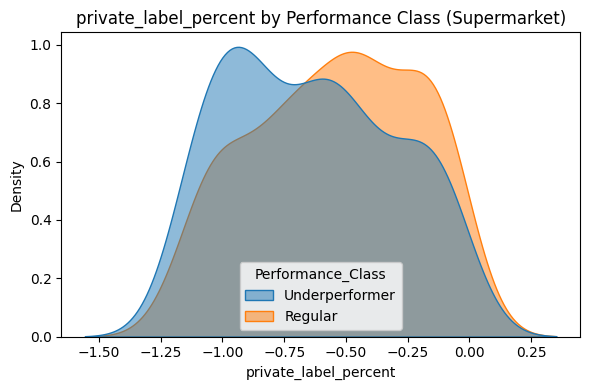


Store Format: Hypermarket
Significant features: ['staff_per_sqm']


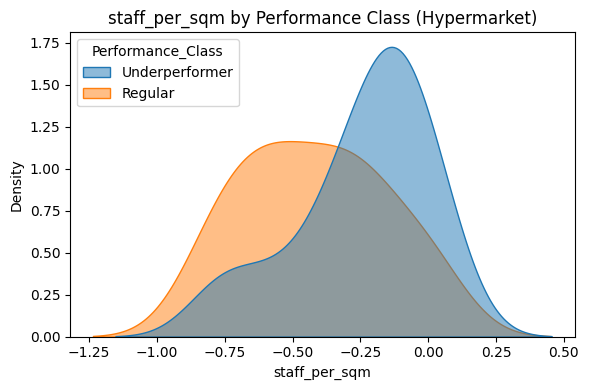


Store Format: Discounter
Significant features: ['store_area_sqm']


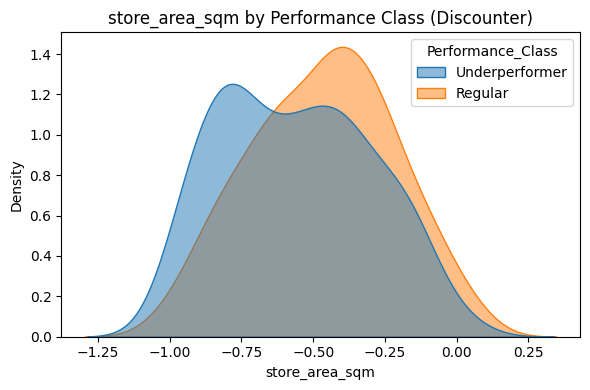

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Step 4: Plot Focused KDEs for Significant Features (Excluding State and Store Format Dummies) ---
significance_threshold = 0.05
signif_features_by_format = {}

for fmt in combined_test['store_format'].unique():
    subset_res = combined_results_df[
        (combined_results_df['store_format'] == fmt) & 
        (combined_results_df['P-Value'] < significance_threshold)
    ]
    features = subset_res['Feature'].unique()
    features = [feat for feat in features 
                if not (feat.startswith("federal_state_") or feat.startswith("store_format_"))]
    signif_features_by_format[fmt] = features

for fmt, features in signif_features_by_format.items():
    if len(features) == 0:
        print(f"No significant features for store format '{fmt}'.")
        continue
    print(f"\nStore Format: {fmt}")
    print("Significant features:", features)
    subset_data = combined_test[combined_test['store_format'] == fmt]
    for feat in features:
        plt.figure(figsize=(6, 4))
        sns.kdeplot(
            data=subset_data, x=feat, hue='Performance_Class',
            fill=True, common_norm=False, alpha=0.5
        )
        plt.title(f"{feat} by Performance Class ({fmt})")
        plt.xlabel(feat)
        plt.tight_layout()
        plt.show()


Now just doing the same as above for unscaled data again (for sake of interpretability)


Store Format: Convenience
                      Feature  T-Statistic       P-Value  Underperformer_Mean  \
31   store_format_Hypermarket     6.000000  6.949528e-07            -0.344791   
30    federal_state_Thuringia     6.000000  6.949528e-07            -0.174600   
16      federal_state_Bavaria    -2.898275  6.351941e-03            -0.420770   
18  federal_state_Brandenburg     2.449490  2.198300e-02             1.024817   
0             store_age_years     2.282486  2.875238e-02             0.165075   

    Regular_Mean  Mean_Difference  
31     -0.344791     5.551115e-17  
30     -0.174600     2.775558e-17  
16      0.108461    -5.292311e-01  
18     -0.172049     1.196866e+00  
0      -0.485389     6.504642e-01  

Store Format: Supermarket
                     Feature  T-Statistic       P-Value  Underperformer_Mean  \
32  store_format_Supermarket   -11.489125  1.318810e-21             1.235442   
31  store_format_Hypermarket    11.489125  1.318810e-21            -0.344791   
3  

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occ


Store Format: Discounter
                        Feature  T-Statistic       P-Value  \
31     store_format_Hypermarket   -10.954451  8.844413e-20   
32     store_format_Supermarket   -10.816654  2.532808e-19   
1                store_area_sqm    -2.869757  4.481297e-03   
28  federal_state_Saxony-Anhalt     1.972363  5.016680e-02   
8               avg_income_area    -1.830009  6.854949e-02   

    Underperformer_Mean  Regular_Mean  Mean_Difference  
31            -0.344791     -0.344791    -5.551115e-17  
32            -0.809427     -0.809427    -2.220446e-16  
1             -0.560885     -0.466431    -9.445448e-02  
28             0.341404     -0.024793     3.661977e-01  
8             -0.093526      0.160142    -2.536675e-01  

Combined T-Test Results by Store Format (preview):
                     Feature  T-Statistic       P-Value  Underperformer_Mean  \
0   store_format_Hypermarket     6.000000  6.949528e-07            -0.344791   
1    federal_state_Thuringia     6.000000  6.94

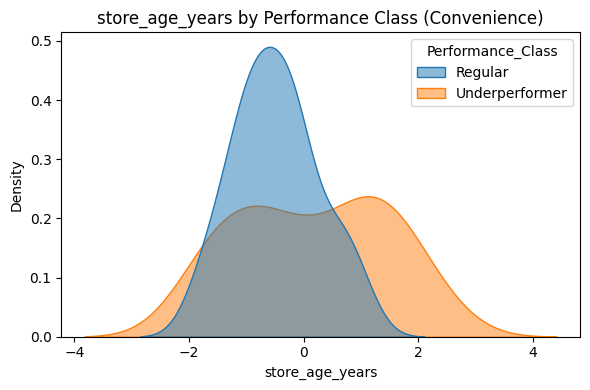

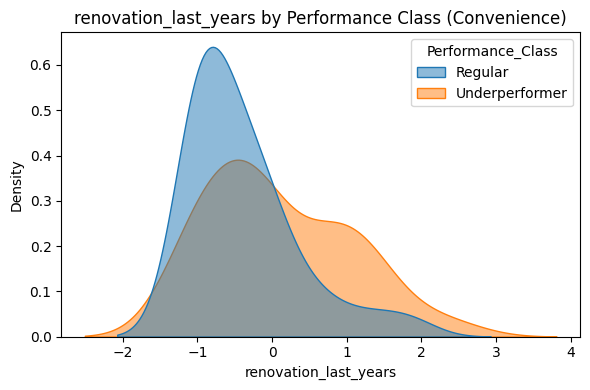


Store Format: Supermarket - Significant features: ['private_label_percent']


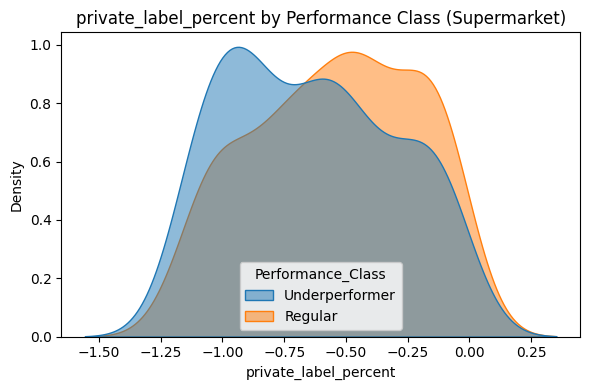


Store Format: Hypermarket - Significant features: ['staff_per_sqm']


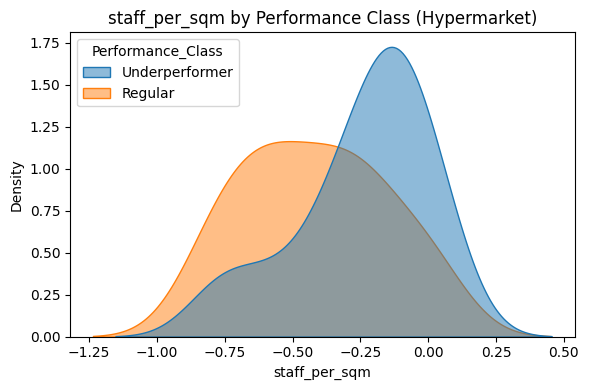


Store Format: Discounter - Significant features: ['store_area_sqm']


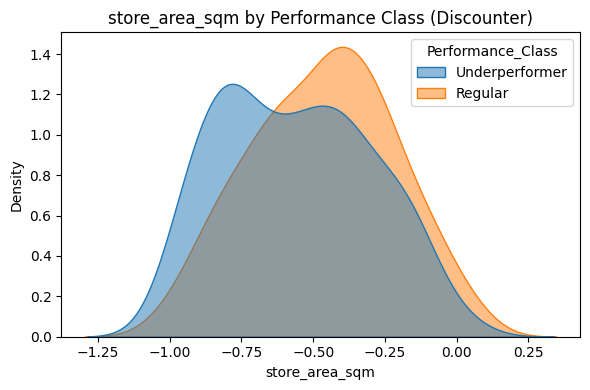

In [100]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# "combined_test" is built from the original (unscaled) test features with ratio features,
# and merged with "store_format", "Performance_Class", and "store_id".

# Identify numeric features for t-test analysis (exclude identifiers and categorical columns)
exclude_cols = ['store_id', 'Performance_Class', 'store_format']
all_features = [col for col in combined_test.columns 
                if col not in exclude_cols and np.issubdtype(combined_test[col].dtype, np.number)]

# Run Welch's t-tests comparing Underperformers vs. Regular by store_format.
results = {}
for fmt in combined_test['store_format'].unique():
    subset = combined_test[combined_test['store_format'] == fmt].copy()
    group_under = subset[subset['Performance_Class'] == 'Underperformer']
    group_reg = subset[subset['Performance_Class'] == 'Regular']
    test_results = []
    for feature in all_features:
        if len(group_under) > 1 and len(group_reg) > 1:
            t_stat, p_value = ttest_ind(group_under[feature], group_reg[feature], equal_var=False)
            mean_diff = group_under[feature].mean() - group_reg[feature].mean()
            test_results.append({
                'Feature': feature,
                'T-Statistic': t_stat,
                'P-Value': p_value,
                'Underperformer_Mean': group_under[feature].mean(),
                'Regular_Mean': group_reg[feature].mean(),
                'Mean_Difference': mean_diff
            })
    results_df = pd.DataFrame(test_results).sort_values(by='P-Value')
    results[fmt] = results_df
    print(f"\nStore Format: {fmt}")
    print(results_df.head())

# Combine t-test results for preview.
combined_results = []
for fmt, df_res in results.items():
    df_res = df_res.copy()
    df_res['store_format'] = fmt
    combined_results.append(df_res)
combined_results_df = pd.concat(combined_results, ignore_index=True)
print("\nCombined T-Test Results by Store Format (preview):")
print(combined_results_df.sort_values(['store_format', 'P-Value']).head(10))

# Identify significant features (p < 0.05), excluding state and store format dummies.
significance_threshold = 0.05
signif_features_by_format = {}
for fmt in combined_test['store_format'].unique():
    subset_res = combined_results_df[
        (combined_results_df['store_format'] == fmt) & 
        (combined_results_df['P-Value'] < significance_threshold)
    ]
    features = subset_res['Feature'].unique()
    features = [feat for feat in features 
                if not (feat.startswith("federal_state_") or feat.startswith("store_format_"))]
    signif_features_by_format[fmt] = features

# Generate overlaid KDE plots for each significant feature.
for fmt, features in signif_features_by_format.items():
    if len(features) == 0:
        print(f"No significant features for store format '{fmt}'.")
        continue
    print(f"\nStore Format: {fmt} - Significant features: {features}")
    subset_data = combined_test[combined_test['store_format'] == fmt]
    for feat in features:
        plt.figure(figsize=(6, 4))
        sns.kdeplot(data=subset_data, x=feat, hue='Performance_Class', fill=True, common_norm=False, alpha=0.5)
        plt.title(f"{feat} by Performance Class ({fmt})")
        plt.xlabel(feat)
        plt.tight_layout()
        plt.show()
